In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
#import pandas as pd
from scipy.signal import lombscargle
rng = np.random.default_rng()

In [22]:
days = 20 #duration of the observation (in days)
dt = 60/86400 #time step between observations
x = np.arange(0,days,dt)
pts = len(x)

NoiseScale = 2
#NoiseScale = np.arange(0,5.05,0.5)
#A = 4.0
A = np.arange(1,8.05,0.2)
w0 = 2

for i in range(len(A)):
    if i == 0:
        y = np.array([A[i]*np.sin(w0*x)])
    else:
        y = np.append(y,[A[i]*np.sin(w0*x)],axis=0)

"""#y = A * np.cos(w0*x)
plt.plot(x,y);
np.random.seed(3)
err = np.random.normal(scale=NoiseScale,size=pts)
y_err = y + err
"""

'#y = A * np.cos(w0*x)\nplt.plot(x,y);\nnp.random.seed(3)\nerr = np.random.normal(scale=NoiseScale,size=pts)\ny_err = y + err\n'

In [23]:
def Luca_LombScargle(x,y_err,w0,nout):
  import numpy as np
  from scipy.signal import lombscargle
  w = np.linspace(0.01, 10, nout)
  err = np.random.normal(scale=NoiseScale,size=pts)
  y_err = y + err
  pgram = lombscargle(x, y_err, w, normalize=True)
  fig, (ax_t, ax_w) = plt.subplots(2, 1, constrained_layout=True)
  ax_t.plot(x, y_err, 'b+')
  ax_t.set_xlabel('Time [s]')

  ax_w.plot(w, pgram)
  ax_w.set_xlabel('Angular frequency [rad/s]')
  ax_w.set_ylabel('Normalized amplitude')
  plt.show()
  periodDet = w[np.argmax(pgram)]
  print(f"The period determination is: {periodDet}")
  print(f"The absolute error is: {abs(w0-periodDet)}")
  print(f"The percent error is {100*(abs(w0-periodDet)/w0)}%")

In [24]:
def error_LombScargle(x,y_err,w0,nout,NoiseScale):
  import numpy as np
  from scipy.signal import lombscargle

  percentErr = np.array([])
  absErr = np.array([])
  for i in range(len(NoiseScale)):
    w = np.linspace(0.01, 10, nout)
    err = np.random.normal(scale=NoiseScale[i],size=len(x))
    y_err = y + err
    pgram = lombscargle(x, y_err, w, normalize=True)

    periodDet = w[np.argmax(pgram)]
    """
    print(f"The period determination is: {periodDet}")
    print(f"The absolute error is: {abs(w0-periodDet)}")
    print(f"The percent error is: {100*(abs(w0-periodDet)/w0)}")
    """
    percentErr = np.append(percentErr,100*(abs(w0-periodDet)/w0))
    absErr = np.append(absErr,abs(w0-periodDet))

  return absErr, percentErr

In [25]:
def amp_LombScargle(x,y_array,A,w0,nout,NoiseScale):
  import numpy as np
  from scipy.signal import lombscargle

  percentErr = np.array([])
  absErr = np.array([])
  for i in range(len(A)):
    y = y_array[i,:]
    np.random.seed(3)
    w = np.linspace(0.01, 10, nout)
    err = np.random.normal(scale=NoiseScale,size=len(x))
    y_err = y + err
    pgram = lombscargle(x, y_err, w, normalize=True)

    periodDet = w[np.argmax(pgram)]
    """
    print(f"The period determination is: {periodDet}")
    print(f"The absolute error is: {abs(w0-periodDet)}")
    print(f"The percent error is: {100*(abs(w0-periodDet)/w0)}")
    """
    percentErr = np.append(percentErr,100*(abs(w0-periodDet)/w0))
    absErr = np.append(absErr,abs(w0-periodDet))

  return absErr, percentErr

In [26]:
#absErr, percentErr = error_LombScargle(x,y,w0,1000,NoiseScale)

In [27]:
"""
absErr, percentErr = amp_LombScargle(x,y,A,w0,100000,NoiseScale)
Try to segment this into multiple different cells, or port over to colab.
"""

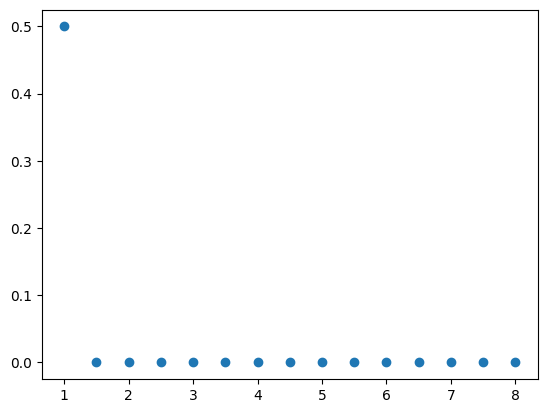

In [ ]:
#plt.scatter(A,percentErr)

In [ ]:
# Luca_LombScargle(x,y,w0,10000,NoiseScale)

# Fourier transform (requires uniform data, might turn into Wavelet) (Benched)

In [ ]:
"""yf = fft(y_err)
T = 13/pts
xf = fftfreq(pts, T)[:pts//2]
plt.plot(xf, 13.0/pts * np.abs(yf[0:pts//2]))
plt.xlim(0,2)
max(13.0/pts * np.abs(yf[0:pts//2]))"""

'yf = fft(y_err)\nT = 13/pts\nxf = fftfreq(pts, T)[:pts//2]\nplt.plot(xf, 13.0/pts * np.abs(yf[0:pts//2]))\nplt.xlim(0,2)\nmax(13.0/pts * np.abs(yf[0:pts//2]))'

# Autocorrelation section (Benched)

In [ ]:
def Autocorr(y):
  y_series = pd.Series(y)
  ACF = []
  for i in range(len(y)):
    ACF = np.append(ACF,y_series.autocorr(lag=i))
#  plt.plot(ACF)
#  return ACF
  acceptedVar = []
  for i in range(len(ACF)):
      if ACF[i] > 0.05:
          acceptedVar = np.append(acceptedVar, ACF[i])
  plt.plot(ACF)
  return ACF

In [ ]:
"""y_series = Autocorr(y_err)
max(y_series[500:-1000])"""

'y_series = Autocorr(y_err)\nmax(y_series[500:-1000])'

# Lomb-Scargle section

In [ ]:
# rng = np.random.default_rng()

In [ ]:
"""A = 3.
w0 = 2.  # rad/sec
nin = pts
nout = 100000"""

'A = 3.\nw0 = 2.  # rad/sec\nnin = pts\nnout = 100000'

In [ ]:
"""NoiseScale=3.0
err = np.random.normal(scale=NoiseScale,size=pts)"""

'NoiseScale=3.0\nerr = np.random.normal(scale=NoiseScale,size=pts)'

In [ ]:
"""y = A * np.cos(w0*x)
y_err = y + err
w = np.linspace(0.01, 10, nout)"""

'y = A * np.cos(w0*x)\ny_err = y + err\nw = np.linspace(0.01, 10, nout)'

In [ ]:
# pgram = lombscargle(x, y_err, w, normalize=True)

In [ ]:
"""fig, (ax_t, ax_w) = plt.subplots(2, 1, constrained_layout=True)
ax_t.plot(x, y_err, 'b+')
ax_t.set_xlabel('Time [s]')

ax_w.plot(w, pgram)
ax_w.set_xlabel('Angular frequency [rad/s]')
ax_w.set_ylabel('Normalized amplitude')
plt.show()
periodDet = w[np.argmax(pgram)]
print(f"The period determination is: {periodDet}")"""

'fig, (ax_t, ax_w) = plt.subplots(2, 1, constrained_layout=True)\nax_t.plot(x, y_err, \'b+\')\nax_t.set_xlabel(\'Time [s]\')\n\nax_w.plot(w, pgram)\nax_w.set_xlabel(\'Angular frequency [rad/s]\')\nax_w.set_ylabel(\'Normalized amplitude\')\nplt.show()\nperiodDet = w[np.argmax(pgram)]\nprint(f"The period determination is: {periodDet}")'

In [ ]:
"""print(f"The absolute error is: {abs(w0-periodDet)}")
print(f"The percent error is {100*(abs(w0-periodDet)/w0)}%")"""

'print(f"The absolute error is: {abs(w0-periodDet)}")\nprint(f"The percent error is {100*(abs(w0-periodDet)/w0)}%")'

In [ ]:
#len(x)